<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-22 13:11:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  50.2MB/s    in 3.0s    

2025-04-22 13:11:15 (50.2 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [ ]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [ ]:
QUERY = """
SELECT COUNT(*)
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


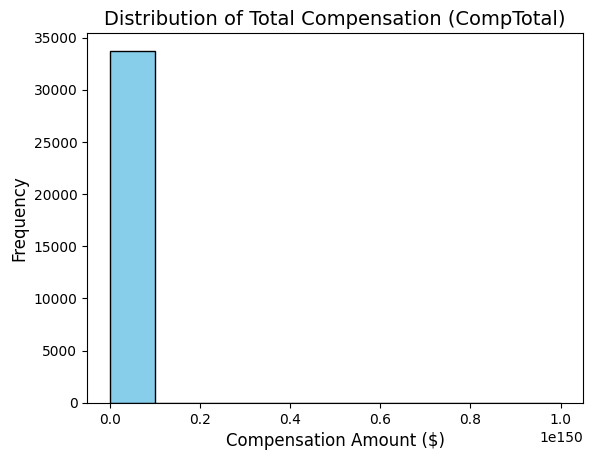

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data has been extracted into a Pandas DataFrame
data = pd.read_sql("SELECT CompTotal FROM main", conn)

# If you have the data in a list or array, you can directly use it like this:

# Plotting the histogram
plt.hist(data, bins=10, edgecolor='black', color='skyblue')

# Adding titles and labels
plt.title('Distribution of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Compensation Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [ ]:
QUERY = """
SELECT CompTotal
FROM main
"""
data = pd.read_sql_query(QUERY, conn)
data = data.dropna()
data

,CompTotal
72,2040000.0
374,28000.0
379,85000.0
385,50000.0
389,110000.0
...,...
65396,36000.0
65401,40000.0
65408,61000.0
65412,58000.0


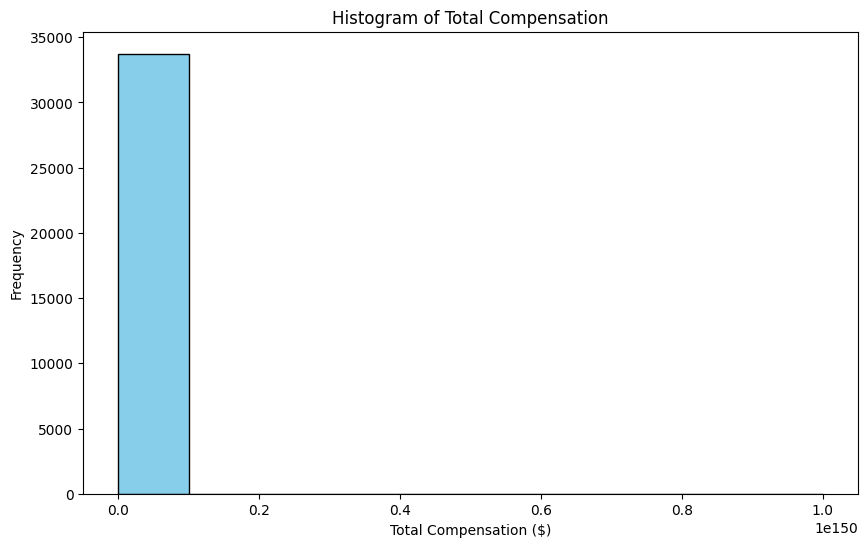

In [ ]:
## Write your code here
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total Compensation ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Compensation')

# Show the plot
plt.show()

**Box Plots**

Plot a box plot of Age.


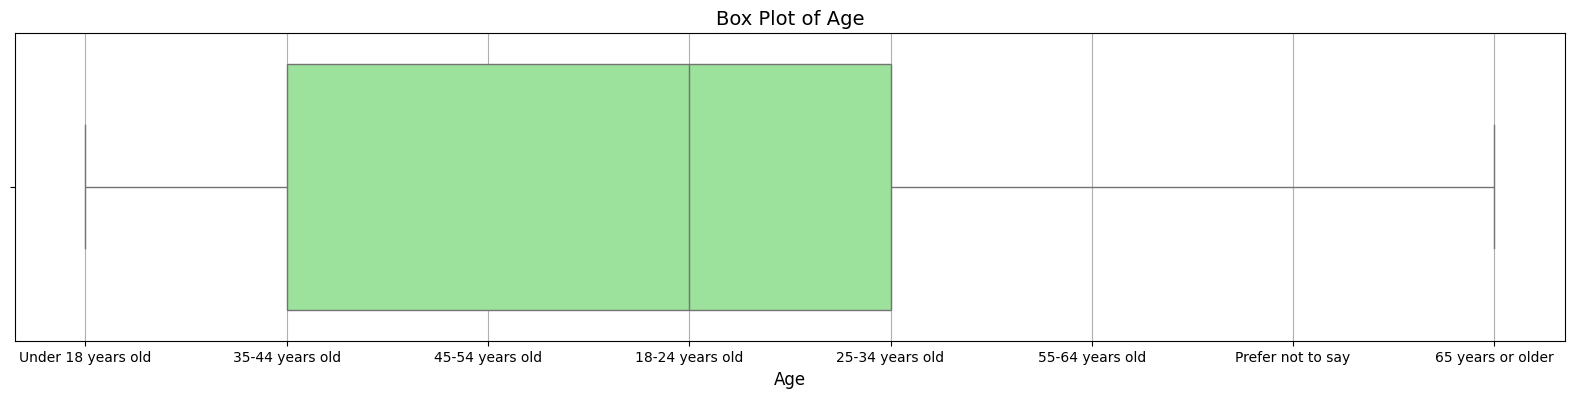

In [ ]:
## Write your code here
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Replace with your actual Age data
# Normally you'd get this via SQL and a connection
data = pd.read_sql("SELECT Age FROM main", conn)

# Create a DataFrame for consistency
df = pd.DataFrame(data)

# Plot box plot
plt.figure(figsize=(20, 4))
sns.boxplot(x='Age', data=df, color='lightgreen')

plt.title('Box Plot of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.grid(True, axis='x')
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


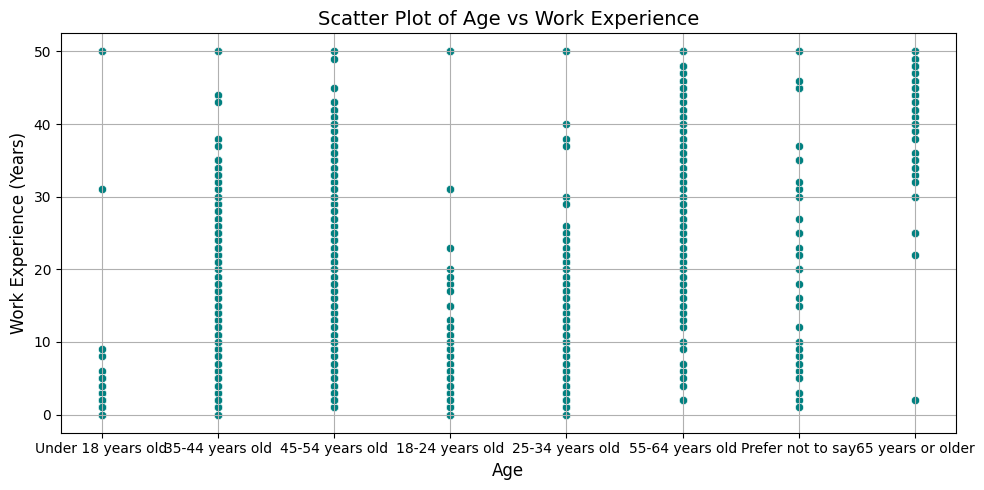

In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example dataset (replace with your actual query results)
# You can use pd.read_sql() to load data from SQL if needed
data = pd.read_sql('SELECT Age,WorkExp from main', conn)
df = pd.DataFrame(data)

# Plotting the scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='WorkExp', color='teal')

# Add titles and labels
plt.title('Scatter Plot of Age vs Work Experience', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [ ]:
data = pd.read_sql('Select TimeSearching,Frustration, Age from main', conn)
df = pd.DataFrame(data)

df.fillna({'TimeSearching' : np.nan}, inplace=True)
df.fillna({'Frustration' : np.nan}, inplace=True)

df.dropna(inplace=True)

df['Frustration'].unique()
df = df.assign(
    Frustration_Reasons=df['Frustration'].str.split(';')
).explode('Frustration_Reasons')
df

,TimeSearching,Frustration,Age,Frustration_Reasons
10,30-60 minutes a day,Amount of technical debt;Number of software to...,35-44 years old,Amount of technical debt
10,30-60 minutes a day,Amount of technical debt;Number of software to...,35-44 years old,Number of software tools in use
10,30-60 minutes a day,Amount of technical debt;Number of software to...,35-44 years old,Tracking my work
10,30-60 minutes a day,Amount of technical debt;Number of software to...,35-44 years old,Showing my contributions
12,30-60 minutes a day,Amount of technical debt;Complexity of tech st...,35-44 years old,Amount of technical debt
...,...,...,...,...
65268,Less than 15 minutes a day,None of these,25-34 years old,None of these
65351,15-30 minutes a day,Complexity of tech stack for deployment;Comple...,25-34 years old,Complexity of tech stack for deployment
65351,15-30 minutes a day,Complexity of tech stack for deployment;Comple...,25-34 years old,Complexity of tech stack for build
65412,15-30 minutes a day,Amount of technical debt;Reliability of tools/...,35-44 years old,Amount of technical debt


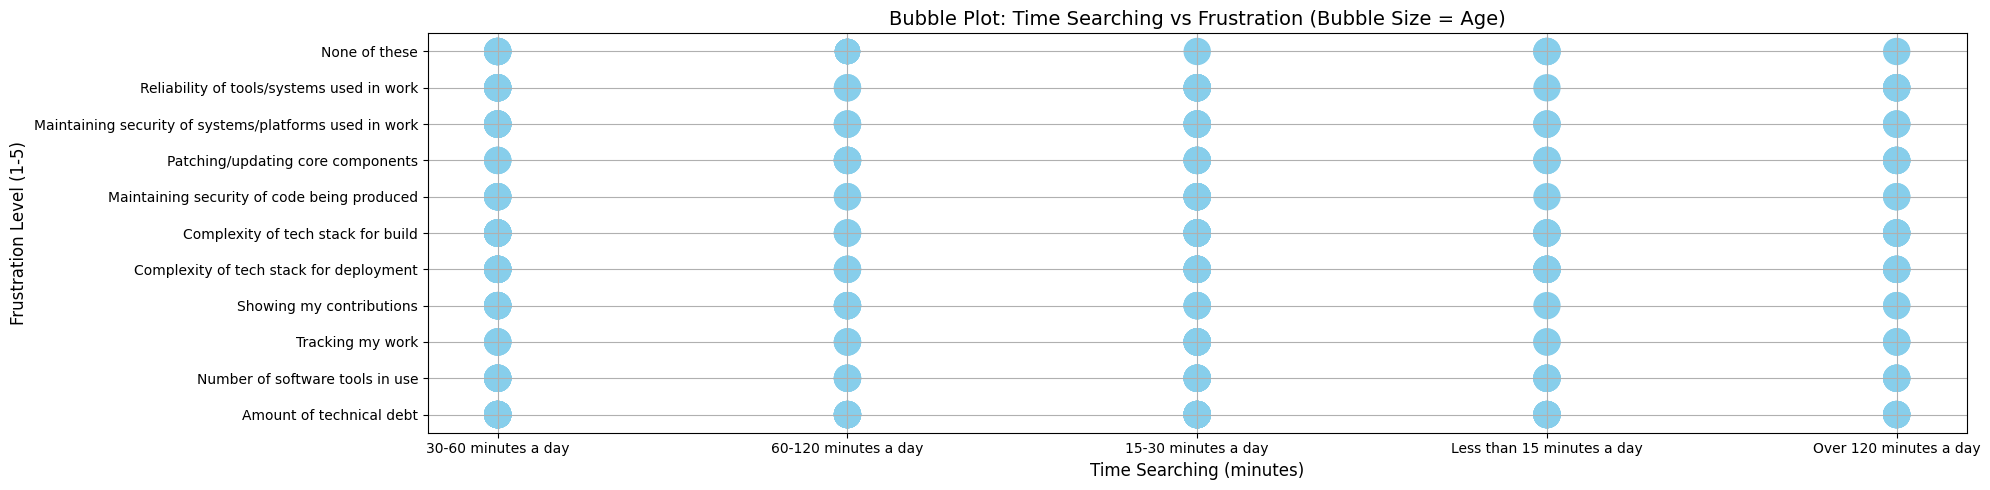

In [ ]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Example data — replace this with your actual query results
data = pd.read_sql('Select TimeSearching,Frustration, Age from main', conn)
df = pd.DataFrame(data)

df.fillna({'TimeSearching' : np.nan}, inplace=True)
df.fillna({'Frustration' : np.nan}, inplace=True)

df.dropna(inplace=True)

df['Frustration'].unique()
df = df.assign(
    Frustration_Reasons=df['Frustration'].str.split(';')
).explode('Frustration_Reasons')

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Apply the mapping
df['Age_numeric'] = df['Age'].map(age_map)

# Create bubble plot
plt.figure(figsize=(20, 5))
plt.scatter(
    df['TimeSearching'],
    df['Frustration_Reasons'],
    s = df['Age_numeric']*5,
    c='skyblue',
)

# Add labels and title
plt.title('Bubble Plot: Time Searching vs Frustration (Bubble Size = Age)', fontsize=14)
plt.xlabel('Time Searching (minutes)', fontsize=12)
plt.ylabel('Frustration Level (1-5)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


<Axes: xlabel='TimeSearching', ylabel='Frustration_Reasons'>

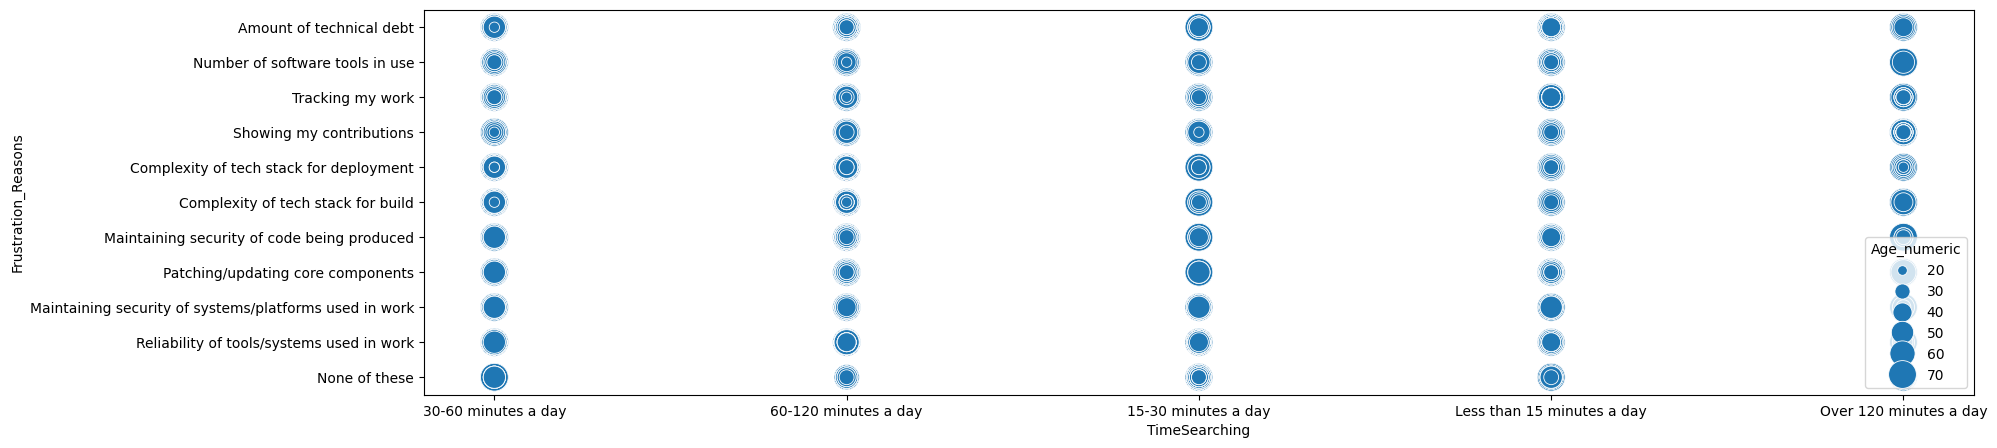

In [ ]:
plt.figure(figsize=(20, 5))

sns.scatterplot(data=df, x="TimeSearching", y="Frustration_Reasons", size="Age_numeric",
                sizes=(20, 400))  # min and max size


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


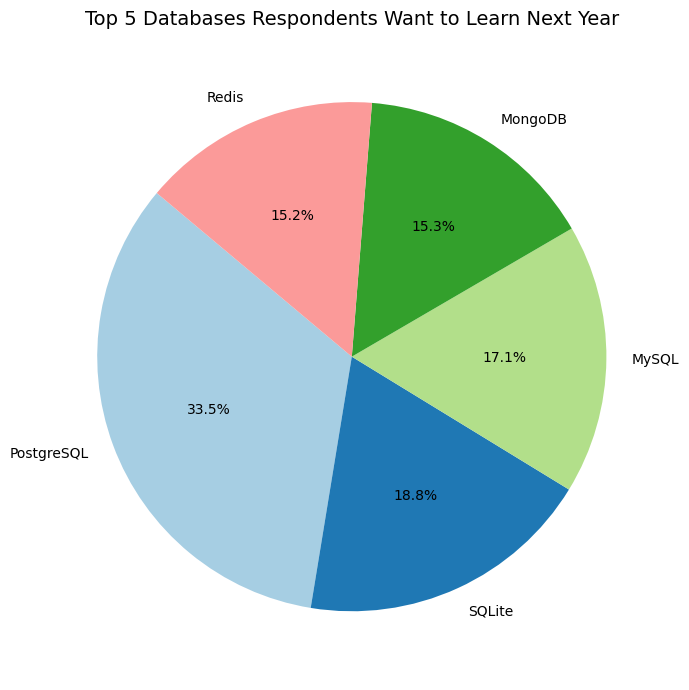

In [ ]:
## Write your code here
data = pd.read_sql('SELECT DatabaseWantToWorkWith FROM main ', conn)
df = pd.DataFrame(data)
df.fillna(np.nan)
df.dropna(inplace=True)
df = df.assign(
    Databases= df['DatabaseWantToWorkWith'].str.split(';')
).explode('Databases')
top_5_dbs = df['Databases'].value_counts().head()

plt.figure(figsize=(7, 7))
plt.pie(top_5_dbs, labels=top_5_dbs.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=14)
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()

**Stacked Charts**

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Median Time Searching: 45.0
Median Time Answering: 22.5


<Figure size 600x600 with 0 Axes>

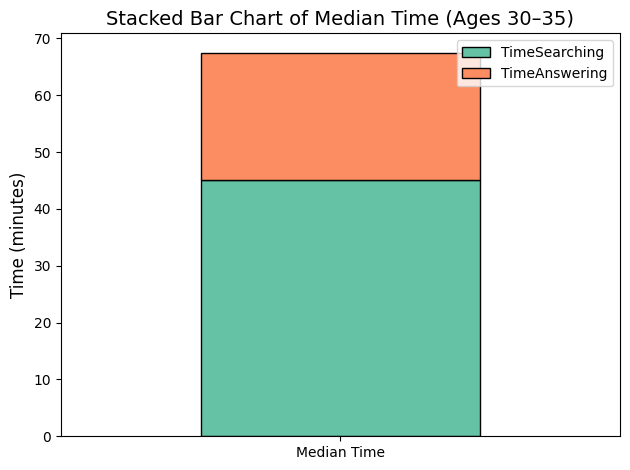

In [ ]:
## Write your code here

data = pd.read_sql('SELECT Age, TimeSearching, TimeAnswering FROM main ',conn)
df = pd.DataFrame(data)

df.fillna(np.nan)
df.dropna(inplace=True)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply the mapping
df['Age_numeric'] = df['Age'].map(age_map)

time_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150  # or whatever estimate makes sense
}

df['TimeSearching_numeric'] = df['TimeSearching'].map(time_map)
df['TimeAnswering_numeric'] = df['TimeAnswering'].map(time_map)

filtered_df = df[(df['Age_numeric'] >= 30) & (df['Age_numeric'] <= 35)]
filtered_df

median_searching = filtered_df['TimeSearching_numeric'].median()
median_answering = filtered_df['TimeAnswering_numeric'].median()

print("Median Time Searching:", median_searching)
print("Median Time Answering:", median_answering)

# Prepare data for stacked bar chart
time_data = pd.DataFrame({
    'Median Time': [median_searching, median_answering]
}, index=['TimeSearching', 'TimeAnswering'])

# Plot
plt.figure(figsize=(6, 6))
time_data.T.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'], edgecolor='black')

plt.title('Stacked Bar Chart of Median Time (Ages 30–35)', fontsize=14)
plt.ylabel('Time (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


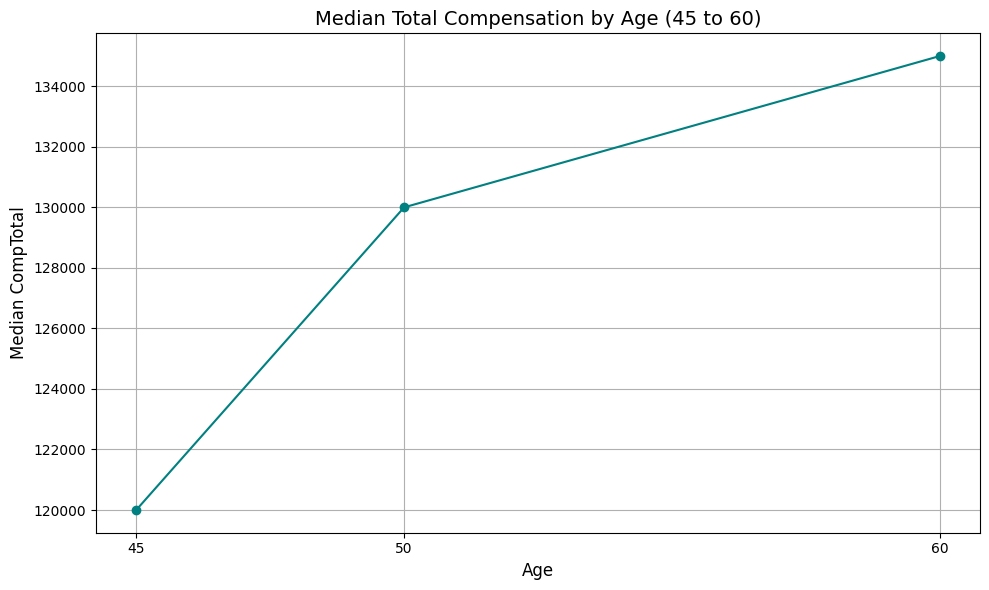

In [ ]:
## Write your code here
data = pd.read_sql('SELECT Age, CompTotal FROM main ',conn)
df = pd.DataFrame(data)

df.fillna(np.nan)
df.dropna(inplace=True)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 45,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Apply the mapping
df['Age_numeric'] = df['Age'].map(age_map)

filtered_df = df[(df['Age_numeric'] >= 45) & (df['Age_numeric'] <= 60)]

median_comp_by_age = filtered_df.groupby('Age_numeric')['CompTotal'].median().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age_numeric'], median_comp_by_age['CompTotal'], marker='o', color='teal')

plt.title('Median Total Compensation by Age (45 to 60)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Median CompTotal', fontsize=12)
plt.grid(True)
plt.xticks(median_comp_by_age['Age_numeric'])  # Ensure all ages show
plt.tight_layout()
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


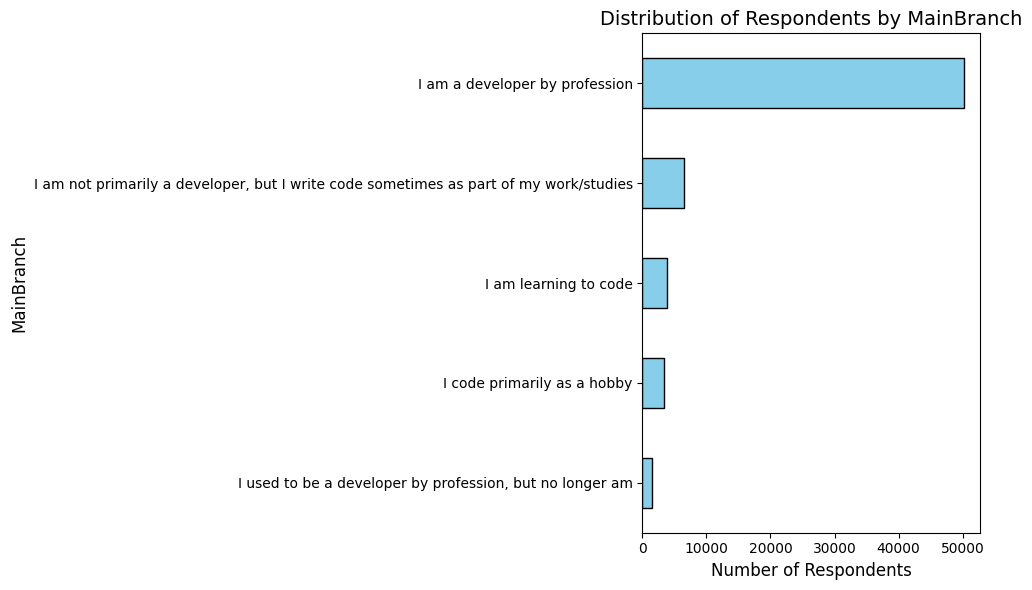

In [ ]:
## Write your code here
data = pd.read_sql('SELECT MainBranch FROM main ',conn)
df = pd.DataFrame(data)

df.fillna(np.nan)
df.dropna(inplace=True)

mainbranch_counts = df['MainBranch'].value_counts()
mainbranch_counts

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Distribution of Respondents by MainBranch', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('MainBranch', fontsize=12)
plt.gca().invert_yaxis()  # Optional: highest value at top
plt.tight_layout()
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
